In [2]:
from collections import defaultdict, Counter
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import minimize_scalar


In [4]:
df = pd.concat([
    pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/adaptive_test_4july/adaptive_speak_test_out_domain_appliances.csv', error_bad_lines=False, warn_bad_lines=True),
    pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/adaptive_test_4july/adaptive_speak_test_out_domain_food.csv', error_bad_lines=False, warn_bad_lines=True),
    pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/adaptive_test_4july/adaptive_speak_test_out_domain_indoor.csv', error_bad_lines=False, warn_bad_lines=True),
    pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/adaptive_test_4july/adaptive_speak_test_out_domain_outdoor.csv', error_bad_lines=False, warn_bad_lines=True),
    pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/adaptive_test_4july/adaptive_speak_test_out_domain_vehicles.csv', error_bad_lines=False, warn_bad_lines=True)
])

# pd.to_numeric(df['target domain'], errors='coerce')

print('target domain   :', df['target domain'].unique())
print('listener domain :', df['listener domain'].unique())
print('simulator domain:', df['simulator domain'].unique())
df = df.dropna()
print('Data points:', len(df))

df.head(5)

/var/folders/0s/847v13g104z23kr193w_v2640000gn/T/ipykernel_7525/2089314111.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/adaptive_test_4july/adaptive_speak_test_out_domain_appliances.csv', error_bad_lines=False, warn_bad_lines=True),
/var/folders/0s/847v13g104z23kr193w_v2640000gn/T/ipykernel_7525/2089314111.py:2: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/adaptive_test_4july/adaptive_speak_test_out_domain_appliances.csv', error_bad_lines=False, warn_bad_lines=True),
b'Skipping line 938: expected 88 fields, saw 104\nSkipping line 6163: expected 88 fields, saw 448\n'
/var/folders/0s/847v13g104z23kr193w_v2640000gn/T/ipykernel_7525/2089314111.py:3: FutureWarning: Th

target domain   : ['vehicles' 'outdoor' 'indoor' 'food' 'appliances']
listener domain : ['food' 'vehicles' 'appliances' 'indoor' 'outdoor' 'all']
simulator domain: ['food' 'vehicles' 'appliances' 'indoor' 'outdoor' 'all']
Data points: 18115


,Unnamed: 0,target domain,listener domain,simulator domain,target img idx,img path #0,img path #1,img path #2,img path #3,img path #4,...,adapted_acc_s0,adapted_acc_s1,adapted_acc_s2,adapted_acc_s3,adapted_acc_s4,adapted_acc_s5,adapted_acc_s6,adapted_acc_s7,adapted_acc_s8,adapted_acc_s9
1,1,vehicles,food,food,3,/home/brandizzi/pb_speaker_adaptation/dataset/...,/home/brandizzi/pb_speaker_adaptation/dataset/...,/home/brandizzi/pb_speaker_adaptation/dataset/...,/home/brandizzi/pb_speaker_adaptation/dataset/...,/home/brandizzi/pb_speaker_adaptation/dataset/...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,vehicles,food,food,4,/home/brandizzi/pb_speaker_adaptation/dataset/...,/home/brandizzi/pb_speaker_adaptation/dataset/...,/home/brandizzi/pb_speaker_adaptation/dataset/...,/home/brandizzi/pb_speaker_adaptation/dataset/...,/home/brandizzi/pb_speaker_adaptation/dataset/...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,vehicles,food,food,3,/home/brandizzi/pb_speaker_adaptation/dataset/...,/home/brandizzi/pb_speaker_adaptation/dataset/...,/home/brandizzi/pb_speaker_adaptation/dataset/...,/home/brandizzi/pb_speaker_adaptation/dataset/...,/home/brandizzi/pb_speaker_adaptation/dataset/...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8,vehicles,food,food,2,/home/brandizzi/pb_speaker_adaptation/dataset/...,/home/brandizzi/pb_speaker_adaptation/dataset/...,/home/brandizzi/pb_speaker_adaptation/dataset/...,/home/brandizzi/pb_speaker_adaptation/dataset/...,/home/brandizzi/pb_speaker_adaptation/dataset/...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,9,vehicles,food,food,5,/home/brandizzi/pb_speaker_adaptation/dataset/...,/home/brandizzi/pb_speaker_adaptation/dataset/...,/home/brandizzi/pb_speaker_adaptation/dataset/...,/home/brandizzi/pb_speaker_adaptation/dataset/...,/home/brandizzi/pb_speaker_adaptation/dataset/...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df

In [5]:
S = 10

In [20]:
df = df[df['target domain'] != df['listener domain']]
df = df[df['listener domain'] != 'all']
df = df[df['simulator domain'] != 'all']
print('OOD data points:', len(df))

OOD data points: 17666


In [21]:
print('{:.2f}'.format(100 * df['original_acc'].mean()))
for s in range(S):
    print('{:.2f}'.format(100 * df[f'adapted_accuracy_s{s}'].mean()))

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [14]:
df['original_acc'].mean()

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [22]:
refs = df['golden utt'].tolist()
hyps = {
    "h0": df['original utt'].tolist(),
    "h0' 0": df['adapted utt s0'].tolist(),
    "h0' 1": df['adapted utt s1'].tolist(),
    "h0' 2": df['adapted utt s2'].tolist(),
    "h0' 3": df['adapted utt s3'].tolist(),
    "h0' 4": df['adapted utt s4'].tolist(),
    "h0' 5": df['adapted utt s5'].tolist(),
    "h0' 6": df['adapted utt s6'].tolist(),
    "h0' 7": df['adapted utt s7'].tolist(),
    "h0' 8": df['adapted utt s8'].tolist(),
    "h0' 9": df['adapted utt s9'].tolist(),
}

In [23]:
vocabs = defaultdict(lambda: Counter())

for ref in refs:
    for tok in ref.strip().split():
        vocabs['ref'][tok] += 1

for hyp_type in hyps:
    for hyp in hyps[hyp_type]:
        for tok in hyp.strip().split():
            vocabs[hyp_type][tok] += 1


In [24]:
def neg_zipf_likelihood(s):
    n = sum(freq_of_word_counts)
    # for each word count, find the probability that a random word has such word count
    probas = word_counts ** (-s) / np.sum(np.arange(1, n+1) **(-s))
    log_likelihood = sum(np.log(probas) * word_counts)
    return -log_likelihood


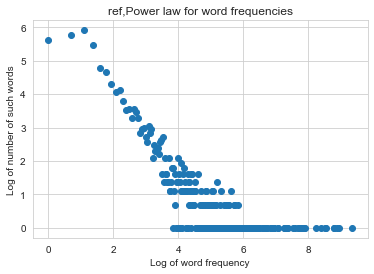

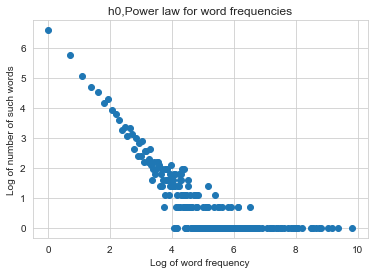

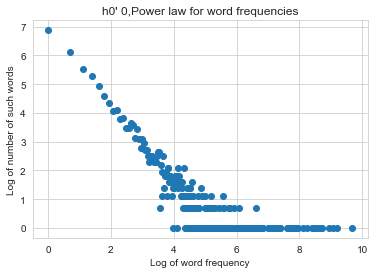

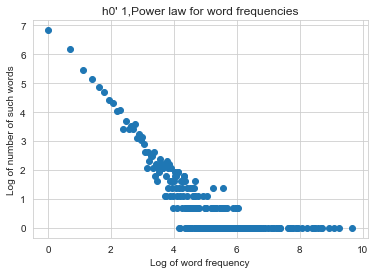

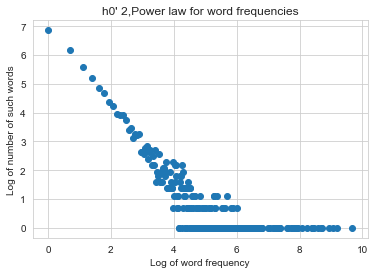

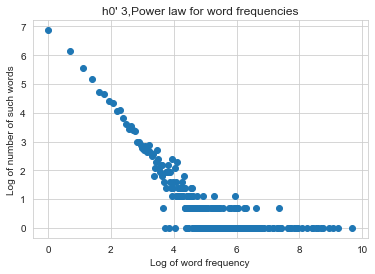

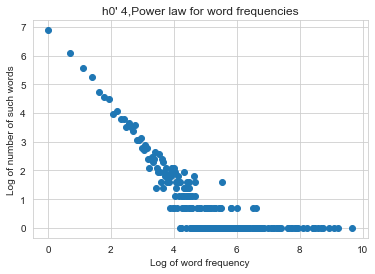

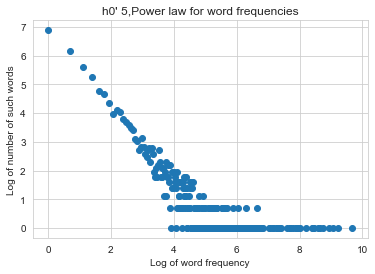

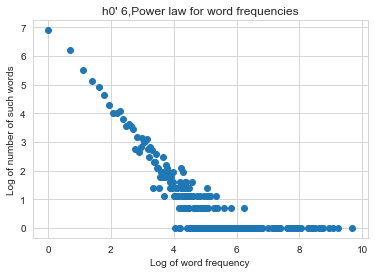

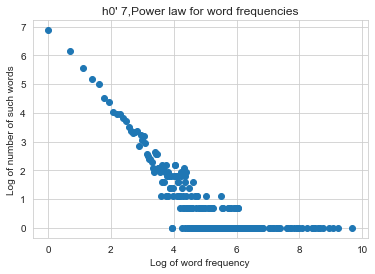

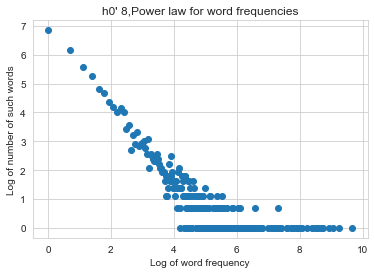

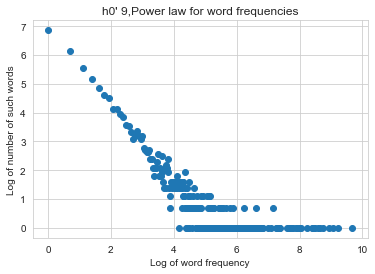

In [25]:
for typ in ['ref'] + list(hyps.keys()):

    counter_of_words = vocabs[typ]
    counter_of_counts = Counter(counter_of_words.values())
    word_counts = np.array(list(counter_of_counts.keys()))
    freq_of_word_counts = np.array(list(counter_of_counts.values()))

    # s_best = minimize_scalar(neg_zipf_likelihood)
    # print()

    plt.scatter(np.log(word_counts), np.log(freq_of_word_counts))
    plt.xlabel('Log of word frequency')
    plt.ylabel('Log of number of such words')
    plt.title(f'{typ},Power law for word frequencies') # (s = {:.2f})'.format(s_best.x))
    plt.show();

for typ in ['ref'] + list(hyps.keys()):
    vocab_df = pd.DataFrame.from_records(vocabs[typ].most_common(), columns=['word','frequency'])
    ax = vocab_df.plot.bar(x='word', y='frequency', title=typ)
    plt.show()

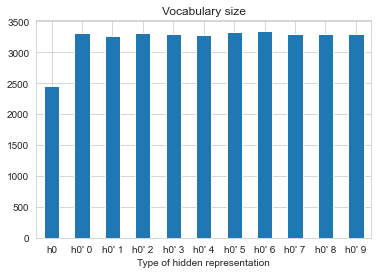

In [26]:
types = list(hyps.keys())

size_df = pd.DataFrame({
    'Type of hidden representation': types,
    'Vocab size': [len(vocabs[x]) for x in types]
})

ax = size_df.plot.bar(x='Type of hidden representation', y='Vocab size', rot=0, title='Vocabulary size')
plt.legend().remove()

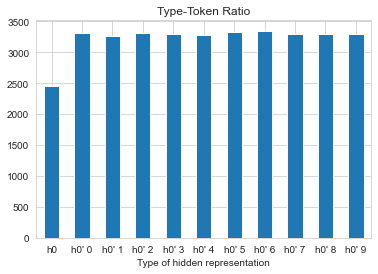

In [27]:
ttr = []
for typ in types:
    ttr.append(len(vocabs[typ]) / sum(vocabs[typ].values()) )

ttr_df = pd.DataFrame({
    'Type of hidden representation': types,
    'ttr': ttr
})

ax = size_df.plot.bar(x='Type of hidden representation', y='Vocab size', rot=0, title='Type-Token Ratio')
plt.legend().remove()